In [162]:
# Linux - install python3-pyaudio 
import sounddevice as sd
import soundfile as sf
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft
from math import ceil

1. SYGNAŁ AUDIO

Zadanie 1

Głos: https://ttsmp3.com/

Zadanie 2

In [163]:
s, fs = sf.read('glos.mp3', dtype='float32')

# sd.play(s, fs)
# sd.wait()

Zadanie 3

Text(0.5, 0, 'Czas [ms]')

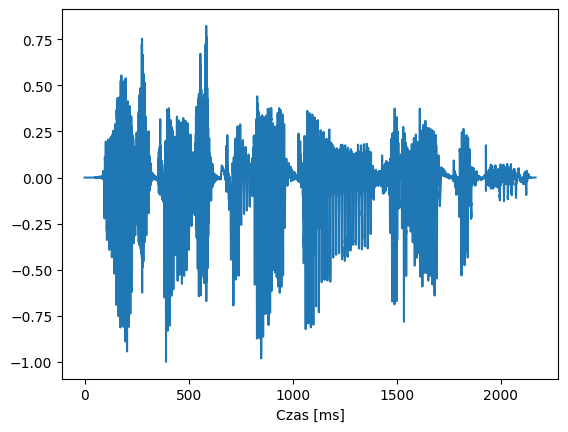

In [164]:
# sygnal_mono_lewy = s[:, 0] # jeśli stereo
# s = sygnal_mono_lewy
s /= np.max(np.abs(s)) # jeśli nie jest znormalizowany

czas_ms = len(s) / fs * 1000

x = np.linspace(0, czas_ms, len(s))

plt.plot(x, s);
plt.xlabel('Czas [ms]')
# plt.xticks(np.linspace(0, czas_ms, 15), rotation=35);


Zadanie 4

Zadanie 5

In [165]:
ramka_10ms = fs * 0.01
liczba_ramek = ceil(len(s) / ramka_10ms)
liczba_ramek

217

2. Zastosowanie okien kroczących

Zadanie 1

In [166]:
ramka_10ms = fs * 0.01
# liczba_ramek = len(s) // ramka_10ms
liczba_ramek = ceil(len(s) / ramka_10ms)
ramki = np.array_split(s, liczba_ramek)

E = [np.sum(np.power(ramka, 2)) for ramka in ramki]
E = np.array(E)

Z = np.empty_like(E)
for i, ramka in enumerate(ramki):
    zi = [0 if ramka[j] * ramka[j + 1] >= 0 else 1 for j in range(len(ramka) - 1)]
    Z[i] = np.sum(zi)

Zadanie 2

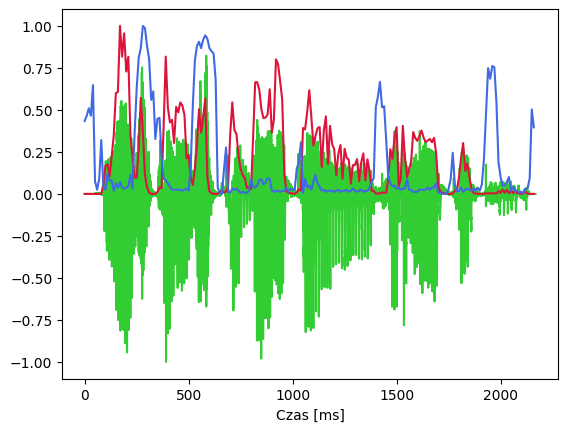

In [167]:
Z /= np.max(np.abs(Z))
E = np.array(E)
E /=  np.max(np.abs(E))

x_ramki = np.arange(0, czas_ms, 10)[:E.shape[0]]

plt.plot(x, s, color='limegreen')
plt.xlabel('Czas [ms]');
plt.plot(x_ramki, E, color='crimson')
plt.plot(x_ramki, Z, color='royalblue');




Zadanie 3

funkcja E:
    minima - momenty ciszy (np. przerwy między słowami gdy słychac jedynie szum mikrofonu)
    maksima - głośniejsze fragmenty (np. wypowiadane słowa)

Funkcja Z:
    maksima - wiele zmian częstotliwości dźwięku
    minima - małe zmiany w częstotliwości dźwięku (np. cisza lub jednolity dźwięk)

Można ich użyć do podziału sygnału na segmenty dźwięcznie i bezdźwięczne:
    funkcja E - sygnał poniżej pewnych wartości można uznać za bezdźwięczny
    funkcja Z - wykrywanie aktywności głosowej

Zadanie 4

In [168]:
ramka_5ms = fs * 0.005
ramka_20ms = fs * 0.02
ramka_50ms = fs * 0.05

liczba_ramek_5ms = len(s) // ramka_5ms
ramki_5ms = np.array_split(s, liczba_ramek_5ms)
liczba_ramek_20ms = len(s) // ramka_20ms
ramki_20ms = np.array_split(s, liczba_ramek_20ms)
liczba_ramek_50ms = len(s) // ramka_50ms
ramki_50ms = np.array_split(s, liczba_ramek_50ms)

E_5ms = [np.sum(np.power(ramka, 2)) for ramka in ramki_5ms]
E_5ms = np.array(E_5ms)
E_20ms = [np.sum(np.power(ramka, 2)) for ramka in ramki_20ms]
E_20ms = np.array(E_20ms)
E_50ms = [np.sum(np.power(ramka, 2)) for ramka in ramki_50ms]
E_50ms = np.array(E_50ms)

Z_5ms = np.empty_like(E_5ms)
for i, ramka in enumerate(ramki_5ms):
    zi = [0 if ramka[j] * ramka[j + 1] > 0 else 1 for j in range(len(ramka) - 1)]
    Z_5ms[i] = np.sum(zi)

Z_20ms = np.empty_like(E_20ms)
for i, ramka in enumerate(ramki_20ms):
    zi = [0 if ramka[j] * ramka[j + 1] > 0 else 1 for j in range(len(ramka) - 1)]
    Z_20ms[i] = np.sum(zi)

Z_50ms = np.empty_like(E_50ms)
for i, ramka in enumerate(ramki_50ms):
    zi = [0 if ramka[j] * ramka[j + 1] > 0 else 1 for j in range(len(ramka) - 1)]
    Z_50ms[i] = np.sum(zi)

Z_5ms /= np.max(np.abs(Z_5ms))
E_5ms /=  np.max(np.abs(E_5ms))
Z_20ms /= np.max(np.abs(Z_20ms))
E_20ms /=  np.max(np.abs(E_20ms))
Z_50ms /= np.max(np.abs(Z_50ms))
E_50ms /=  np.max(np.abs(E_50ms))

x_ramki_5ms = np.arange(0, czas_ms, 5)[:E_5ms.shape[0]]
x_ramki_20ms = np.arange(0, czas_ms, 20)[:E_20ms.shape[0]]
x_ramki_50ms = np.arange(0, czas_ms, 50)[:E_50ms.shape[0]]

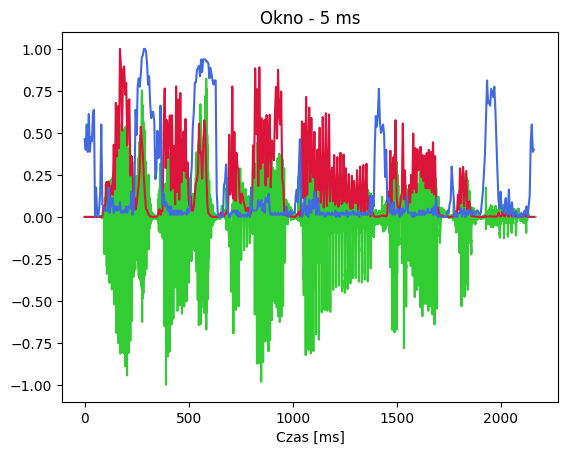

In [169]:
plt.plot(x, s, color='limegreen')
plt.xlabel('Czas [ms]');
plt.plot(x_ramki_5ms, E_5ms, color='crimson')
plt.plot(x_ramki_5ms, Z_5ms, color='royalblue')
plt.title("Okno - 5 ms");

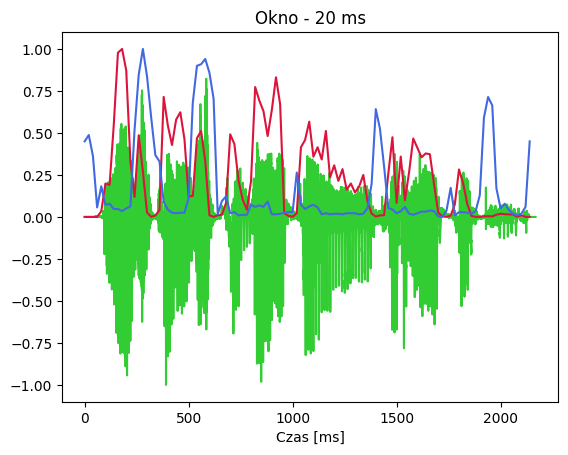

In [170]:
plt.plot(x, s, color='limegreen')
plt.xlabel('Czas [ms]');
plt.plot(x_ramki_20ms, E_20ms, color='crimson')
plt.plot(x_ramki_20ms, Z_20ms, color='royalblue')
plt.title("Okno - 20 ms");

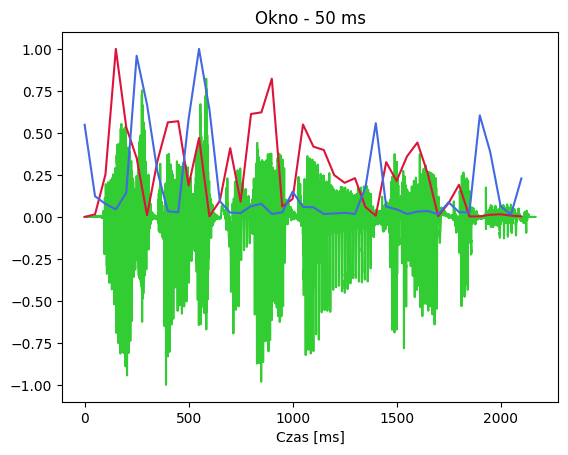

In [171]:
plt.plot(x, s, color='limegreen')
plt.xlabel('Czas [ms]');
plt.plot(x_ramki_50ms, E_50ms, color='crimson')
plt.plot(x_ramki_50ms, Z_50ms, color='royalblue')
plt.title("Okno - 50 ms");

Zadanie 5

In [172]:
przesuniecie = int(ramka_10ms * 0.5)
dl_ramki_50ms = int(fs * 0.05)
ramki_przesuniete = np.lib.stride_tricks.sliding_window_view(s, window_shape=(dl_ramki_50ms,), axis=0)[::przesuniecie]

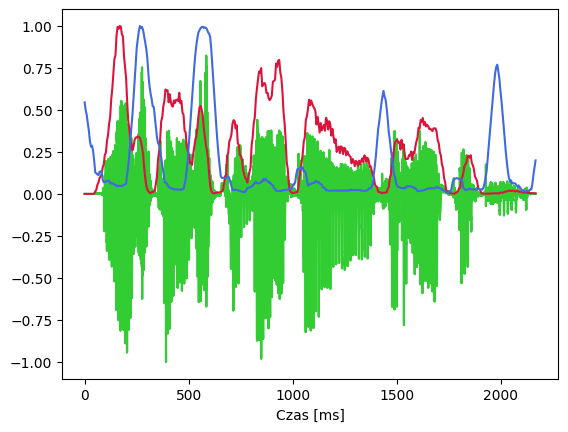

In [173]:
plt.plot(x, s, color='limegreen')
plt.xlabel('Czas [ms]');

E_przesuniete = [np.sum(np.power(ramka, 2)) for ramka in ramki_przesuniete]
E_przesuniete = np.array(E_przesuniete)

Z_przesuniete = np.empty_like(E_przesuniete)
for i, ramka in enumerate(ramki_przesuniete):
    zi = [0 if ramka[j] * ramka[j + 1] > 0 else 1 for j in range(len(ramka) - 1)]
    Z_przesuniete[i] = np.sum(zi)

Z_przesuniete /= np.max(np.abs(Z_przesuniete))
E_przesuniete = np.array(E_przesuniete)
E_przesuniete /=  np.max(np.abs(E_przesuniete))

x_ramki_przesuniete = np.arange(0, czas_ms, 10)[:E_przesuniete.shape[0]]

plt.plot(x, s, color='limegreen')
plt.xlabel('Czas [ms]');
plt.plot(np.linspace(0, x[-1], E_przesuniete.shape[0]), E_przesuniete, color='crimson')
plt.plot(np.linspace(0, x[-1], E_przesuniete.shape[0]), Z_przesuniete, color='royalblue');

3. Analiza częstotliwości

Zadanie 1

Zadanie 2

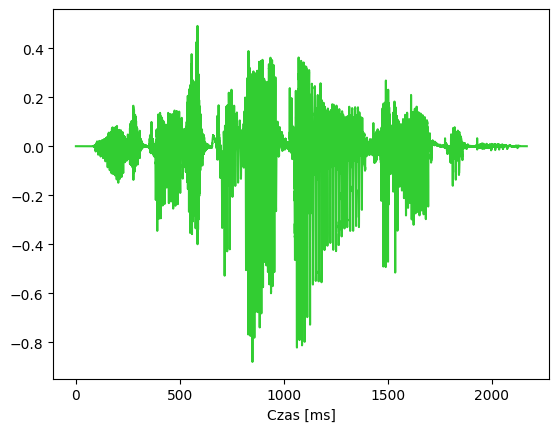

In [174]:
okno_hamminga = np.hamming(len(s))
sh = s * okno_hamminga

plt.plot(x, sh, color='limegreen')
plt.xlabel('Czas [ms]');

Zadanie 3

In [175]:
yf = fft(sh)
log_widmo_amplitudowe = np.log(np.abs(yf))

Zadanie 4

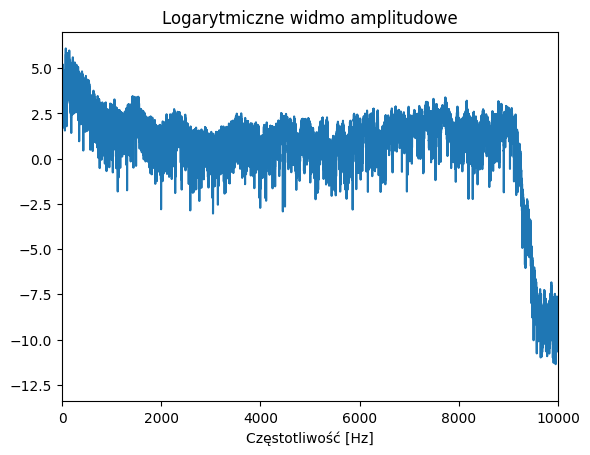

In [176]:
czestotliwosci = np.linspace(0, fs, len(log_widmo_amplitudowe))
plt.plot(czestotliwosci, log_widmo_amplitudowe)
plt.xlim(0, 10000)
plt.xlabel('Częstotliwość [Hz]')
plt.title('Logarytmiczne widmo amplitudowe');

Zadanie 5

In [177]:
F0= czestotliwosci[np.argmax(log_widmo_amplitudowe)]
F0

74.25795385612986